# Problem 2 : compare multiple stock prices in graphical form

Let's comare Apple, TSLA, and MobileIron :)

In [18]:
from pandas_datareader import data
from datetime import datetime
import numpy as np
from matplotlib.dates import strpdate2num
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [19]:
# you may find the tickers in any financial website
tickers = {'AAPL', 'TSLA', 'MOBL'}

In [20]:
# Helper function to store csv record for all stocks since start date 

def create_stock_record(ticker, source):
    start_date = datetime(2014, 6, 12)
    end_date = datetime.today()
    mobl = data.DataReader(ticker, source, start_date, end_date)
    file_name = ticker + '.csv'
    mobl.to_csv(file_name)
    print('record created for ticker : {} with file name {}'.format(ticker, file_name))
    return

In [21]:
# wrapper on create stock record 
def create_stock_records(tickers, source):
    print("inside create_stock_records")
    for ticker in tickers:
        print('creating data for ticker : {} '.format(ticker))
        create_stock_record(ticker, source)
    return

In [22]:
def generate_date():
    source = 'google'
    create_stock_records(tickers, source)
    return

In [23]:
def bytespdate2num(fmt, encoding='ascii'):
    print('format found {}'.format(fmt))
    str_converter = strpdate2num(fmt)

    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)

    return bytes_converter

In [24]:
def graph_data():
    try:
        for stock in tickers:
            stock_file = stock + '.csv'
            print('Plotting for file : {}'.format(stock_file))
            converter = {0: bytespdate2num('%Y-%m-%d')}
            date_p, open_p, high_p, low_p, close_p, volume_p = np.loadtxt(stock_file, delimiter=',', unpack=True,
                                                                          converters=converter, skiprows=1)
            print('file : {} normalization completed'.format(stock_file))

            plt.plot_date(date_p, close_p, '-', label=stock)
    except Exception as ex:
        print('Failed to load file {}'.format(ex))

    plt.xlabel('date')
    plt.ylabel('price')
    plt.title('STOCK COMPARATOR')
    plt.legend()
    plt.show()

inside create_stock_records
creating data for ticker : TSLA 
record created for ticker : TSLA with file name TSLA.csv
creating data for ticker : MOBL 
record created for ticker : MOBL with file name MOBL.csv
creating data for ticker : AAPL 
record created for ticker : AAPL with file name AAPL.csv
Plotting for file : TSLA.csv
format found %Y-%m-%d
file : TSLA.csv normalization completed
Plotting for file : MOBL.csv
format found %Y-%m-%d
file : MOBL.csv normalization completed
Plotting for file : AAPL.csv
format found %Y-%m-%d
file : AAPL.csv normalization completed


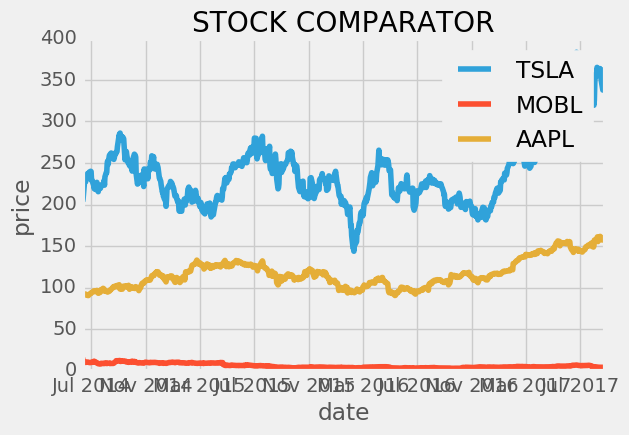

In [25]:
generate_date()
graph_data()
